# Carter Shook Real Estate Investing Final Project

In [1]:
#import all potential packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Provide path for CSV File
csv_file_path = (r'C:/Users/carte/downloads/REI_Dataset2.csv')

In [3]:
#Upload CSV from Downloads
Investing = pd.read_csv(csv_file_path)

In [4]:
Investing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# CLEANING AND EXPLORING THE DATA

<Axes: xlabel='SalePrice'>

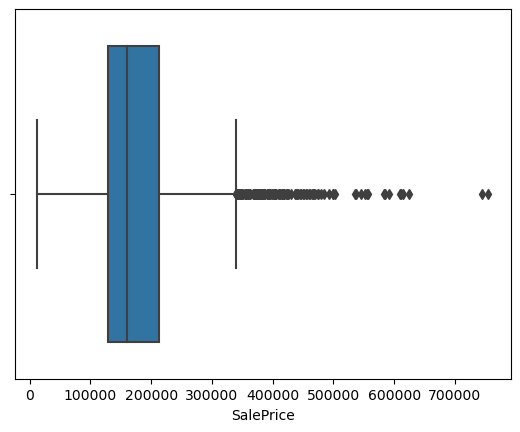

In [5]:
# Box plot to start the cleaning process
sns.boxplot(data=Investing,x="SalePrice")

In [6]:
# What has highest correlation with sale price?
Investing.corr()["SalePrice"].sort_values()

C:\Users\carte\AppData\Local\Temp\ipykernel_12000\907252071.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Investing.corr()["SalePrice"].sort_values()


PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

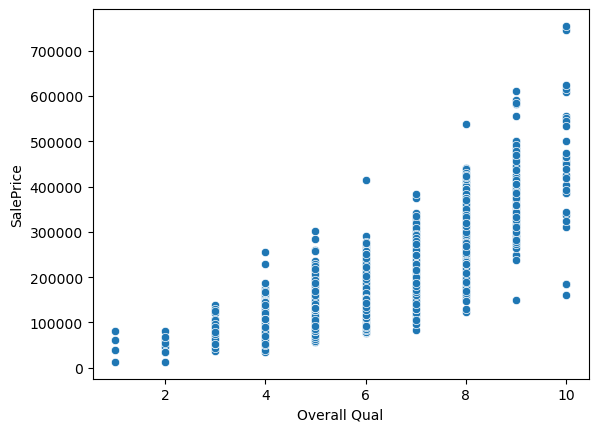

In [7]:
# Scatter plot with highest correlation
sns.scatterplot(x='Overall Qual',y='SalePrice',data=Investing)

In [8]:
# Identify outliers
Investing[(Investing['Overall Qual']>8) & (Investing['SalePrice']<200000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [9]:
Investing[(Investing['Overall Qual']==6) & (Investing['SalePrice']>350000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2737,2738,905427030,75,RL,60.0,19800,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,415000


In [10]:
Investing[(Investing['Overall Qual']==8) & (Investing['SalePrice']>500000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,16,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000


In [11]:
# Drop specific outliers
Investing = Investing.drop(index=[15,2737,1182,1498,2180,2181],axis=0)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

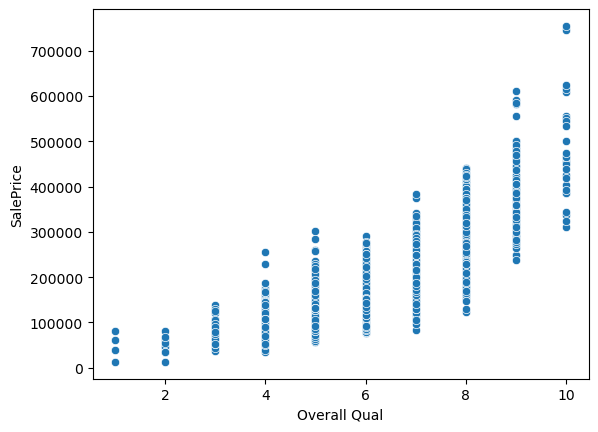

In [12]:
# Look at scatter plot again without outliers
sns.scatterplot(x='Overall Qual',y='SalePrice',data=Investing)

In [13]:
Investing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2924.000000,2.924000e+03,2924.000000,2435.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2901.000000,...,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000
mean,1465.155951,7.143264e+08,57.390561,69.088296,10086.273598,6.089261,5.563953,1971.318741,1984.235978,100.578766,...,93.159371,47.163133,23.042408,2.597811,15.963064,2.083789,44.925103,6.213406,2007.790698,180609.047880
std,845.854692,1.887279e+08,42.674808,22.791488,7738.660753,1.405442,1.110557,30.240687,20.863838,176.054732,...,125.471367,66.581231,64.198857,25.166847,56.026202,34.520113,472.318033,2.711643,1.316740,79574.180785
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,732.750000,5.284770e+08,20.000000,58.000000,7437.500000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129475.000000
50%,1464.500000,5.354532e+08,50.000000,68.000000,9422.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,26.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2198.250000,9.071804e+08,70.000000,80.000000,11512.750000,7.000000,6.000000,2000.250000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
# Find missing data in columns
def missing(Investing):
    percent_nan = 100 * Investing.isnull().sum() / len(Investing) 
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [15]:
percent_nan = missing(Investing)
percent_nan

Electrical         0.034200
Garage Area        0.034200
Total Bsmt SF      0.034200
Bsmt Unf SF        0.034200
BsmtFin SF 1       0.034200
BsmtFin SF 2       0.034200
Garage Cars        0.034200
Bsmt Full Bath     0.068399
Bsmt Half Bath     0.068399
Mas Vnr Area       0.786594
Mas Vnr Type       0.786594
BsmtFin Type 1     2.735978
Bsmt Qual          2.735978
Bsmt Cond          2.735978
BsmtFin Type 2     2.770178
Bsmt Exposure      2.838577
Garage Type        5.369357
Garage Finish      5.437756
Garage Qual        5.437756
Garage Cond        5.437756
Garage Yr Blt      5.437756
Lot Frontage      16.723666
Fireplace Qu      48.632011
Fence             80.437756
Alley             93.228454
Misc Feature      96.409029
Pool QC           99.589603
dtype: float64

In [16]:
Investing = Investing.drop(labels =['Pool Area','Open Porch SF','Pool QC', 'Enclosed Porch','3Ssn Porch', 'PID', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'BsmtFin SF 2', 'Fireplace Qu', 'Misc Feature','Lot Frontage'], axis=1)

In [17]:
#Need to fix garage cars, Total basement SF
Investing['Garage Cars'] = Investing['Garage Cars'].fillna(0)
Investing['Total Bsmt SF'] = Investing['Total Bsmt SF'].fillna(0)

In [18]:
# Different House Styles
house_style_counts = Investing['House Style'].value_counts()

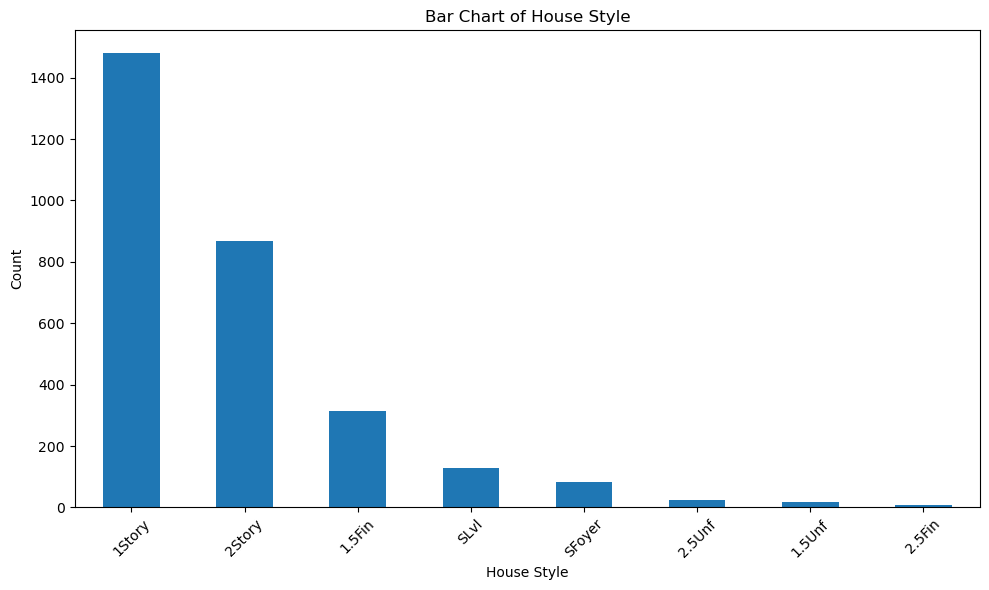

In [19]:
# Create a bar chart
plt.figure(figsize=(10, 6))
house_style_counts.plot(kind='bar')
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('Bar Chart of House Style')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  MODELING

In [20]:
# Add more programs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
# Selecting features and target variable
X = Investing[['Full Bath', 'Garage Cars', 'Bedroom AbvGr', '1st Flr SF', 'Total Bsmt SF', 'Year Built', 'TotRms AbvGrd']]
y = Investing['SalePrice']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Coefficients of the model
coefficients = pd.DataFrame({'Feature': X.columns,'Coefficient': model.coef_})
print(coefficients)

         Feature   Coefficient
0      Full Bath  11978.554024
1    Garage Cars  21448.039645
2  Bedroom AbvGr -14335.864500
3     1st Flr SF     26.929843
4  Total Bsmt SF     52.040594
5     Year Built    543.263957
6  TotRms AbvGrd  18049.677181


In [34]:
# Make predictions for specific properties
new_properties = pd.DataFrame({
    'Full Bath': [2,3],
    'Garage Cars': [2,3],
    'Bedroom AbvGr': [5,2],
    '1st Flr SF': [1200,900],
    'Total Bsmt SF': [600,900],
    'Year Built': [1968,1955],
    'TotRms AbvGrd': [8,5]})

In [35]:
predicted_prices = model.predict(new_properties)
print("Predicted Prices:", predicted_prices)

Predicted Prices: [164933.68807268 187689.63765222]


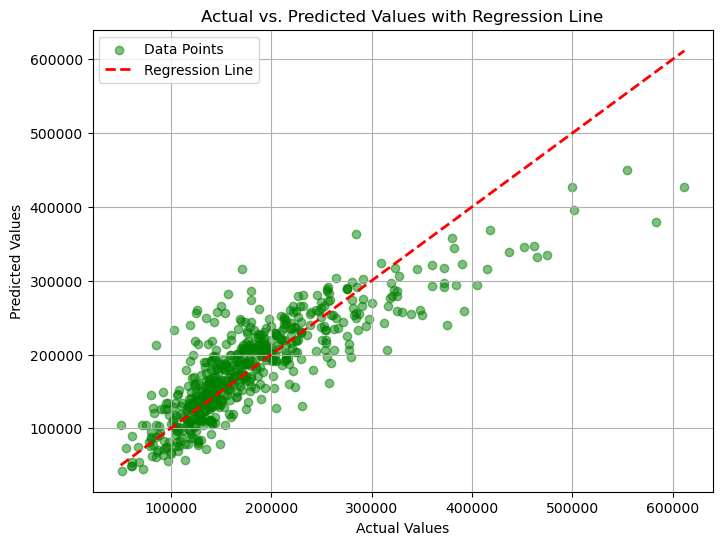

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='green', alpha=0.5, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Select features for the correlation matrix
selected_features = ['Full Bath', 'Garage Cars', 'Bedroom AbvGr', '1st Flr SF','Total Bsmt SF','Year Built','TotRms AbvGrd']

In [30]:
# Calculate the correlation matrix
correlation_matrix = Investing[selected_features].corr()

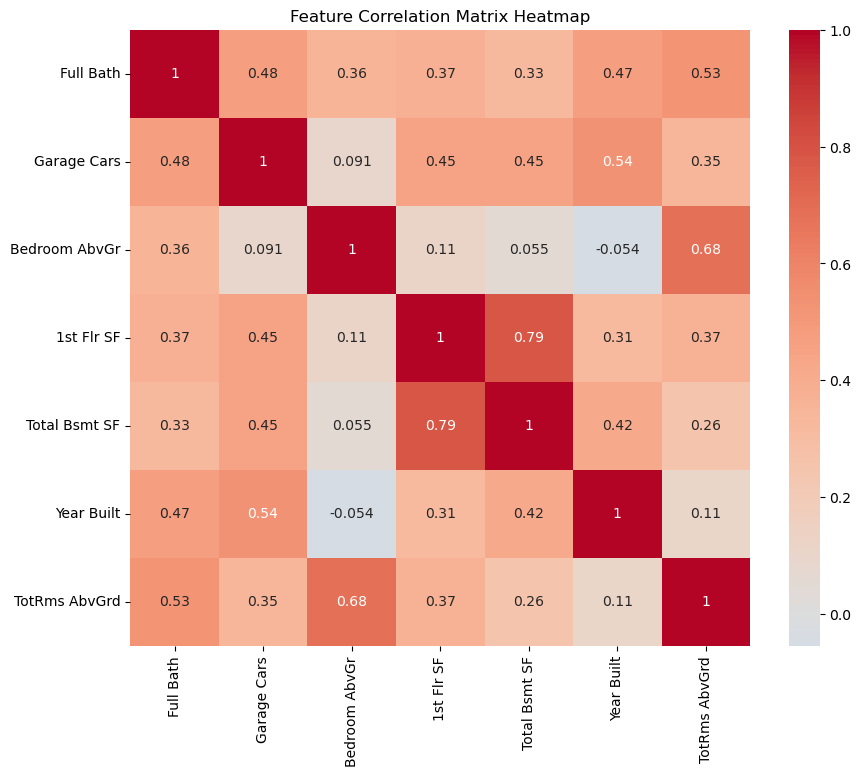

In [31]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix Heatmap')
plt.show()